## 词云图

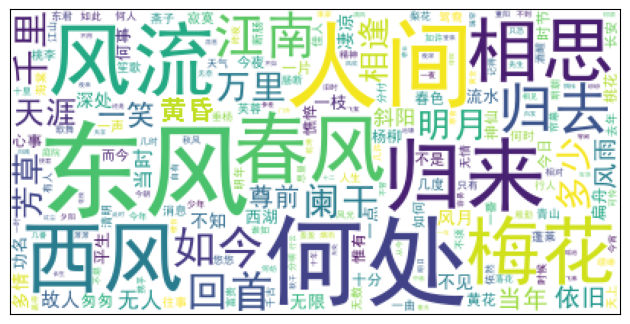

{'东风': 1129, '何处': 1044, '人间': 963, '风流': 704, '归来': 682, '西风': 656, '春风': 654, '梅花': 630, '相思': 601, '归去': 590, '江南': 576, '如今': 544, '回首': 542, '阑干': 539, '多少': 523, '千里': 522, '明月': 493, '万里': 472, '相逢': 448, '芳草': 437, '天涯': 426, '一笑': 426, '黄昏': 423, '依旧': 416, '当年': 411, '风雨': 404, '尊前': 396, '无人': 392, '斜阳': 387, '当时': 387, '故人': 376, '不知': 373, '不见': 362, '多情': 361, '风月': 356, '无限': 353, '深处': 344, '凄凉': 334, '一枝': 334, '匆匆': 326, '流水': 322, '平生': 320, '西湖': 318, '何事': 317, '一点': 314, '扁舟': 310, '功名': 307, '春色': 305, '十分': 305, '今日': 303, '黄花': 294, '时节': 289, '心事': 285, '一片': 284, '杨柳': 280, '惟有': 278, '憔悴': 276, '不是': 274, '神仙': 274, '桃花': 269, '几度': 269, '一声': 264, '而今': 263, '今夜': 261, '寂寞': 261, '如何': 260, '长安': 260, '芙蓉': 258, '何时': 258, '鸳鸯': 257, '消息': 256, '青山': 256, '笙歌': 255, '桃李': 255, '往事': 253, '蓬莱': 252, '燕子': 250, '一曲': 247, '海棠': 247, '无情': 245, '断肠': 243, '明年': 242, '佳人': 240, '清明': 236, '天上': 235, '一番': 235, '去年': 235, '无数': 234, '人生': 233, '天气': 232, '东君': 2

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import jieba
import re


def clean_str(string, sep=" "):
    """
    该函数的作用是去掉一个字符串中的所有非中文字符
    :param string: 输入必须是字符串类型
    :param sep: 表示去掉的部分用什么填充，默认为一个空格
    :return: 返回处理后的字符串
    example:
    s = "祝你2018000国庆快乐！"
    print(clean_str(s))# 祝你 国庆快乐
    print(clean_str(s,sep=""))# 祝你国庆快乐
    """
    string = re.sub(r"[^\u4e00-\u9fff]", sep, string)
    string = re.sub(r"\s{1,}", sep, string)  # 若有空格，则最多只保留1个宽度
    return string.strip()


def load_data_and_cut(file_path='./data/QuanSongCi.txt'):
    cut_words = ""
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            line = line.strip('\n')
            if len(line) < 20:
                continue
            seg_list = jieba.cut(clean_str(line), cut_all=False)
            cut_words += (" ".join(seg_list))
        all_words = cut_words.split()
    return all_words


def get_words_freq(all_words, top_k=500):
    c = Counter()
    for x in all_words:
        if len(x) > 1 and x != '\r\n':
            c[x] += 1
    vocab = {}
    for (k, v) in c.most_common(top_k):
        vocab[k] = v
    return vocab


def show_word_cloud(word_fre):
    word_cloud = WordCloud(font_path='./data/simhei.ttf',
                           background_color='white', max_font_size=70)
    word_cloud.fit_words(word_fre)
    plt.imshow(word_cloud)
    plt.xticks([])  # 去掉横坐标
    plt.yticks([])  # 去掉纵坐标
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    all_words = load_data_and_cut()
    words_freq = get_words_freq(all_words)
    show_word_cloud(words_freq)
    print(words_freq)
